**Content**


This dataset comprises of various house listings in London and neighbouring region. It also encompasses the parameters listed below, the definitions of which are quite self-explanatory.


**Colomns meanings**

Property_Name: Name of the property in the listings

Price_in_Pounds: Price of the property in Pounds (£)

House_Type: Contains one of the following types of houses (House, Flat/Apartment, New Development, Duplex, Penthouse, Studio, Bungalow, Mews)
Area_in_feets: Area of the property in
(ft)2

No_of_Bedrooms: Number of bedrooms in House

No_of_Bathrooms: Number of bathrooms in House

No_of_Receptions: Number of receptions in House

Location: Area in which the House is located

City_County: Includes London, Essex, Middlesex, Hertfordshire, Kent, and Surrey.

Postal_Code: Postal code of the house

House_Type_Int: House_Type but in numbers

Address: Address of the house that includes: City_County, Location, Property_Name and Postal Code

# **Data import**

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import kagglehub
path = kagglehub.dataset_download("arnavkulkarni/housing-prices-in-london")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-in-london


In [3]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f"Найден файл: {filepath}")
        if filename.endswith('.csv'):
            import pandas as pd
            try:
                df = pd.read_csv(filepath)
                print(f"  → Загружен DataFrame: {df.shape}")
            except Exception as e:
                print(f"  → Ошибка загрузки: {e}")

Найден файл: /kaggle/input/housing-prices-in-london/London.csv
  → Загружен DataFrame: (3480, 11)


In [4]:
df.sample(10)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
3439,3439,Chartwell House,772000,New development,603,1,1,1,Battersea,London,SW11 4FA
3385,3385,Blenheim House,6250000,New development,2459,4,4,4,Shad Thames,London,SE1 2SF
2773,2773,Freegrove Road,1799500,House,2761,6,6,6,Holloway,London,N7 9RG
368,368,Turnstone House,1280000,Flat / Apartment,1169,2,2,2,Star Place,London,E1W 1AE
2588,2588,Carver Close,795000,House,1019,3,3,3,Chiswick,London,W4 5BP
3045,3045,Elizabeth Street,3450000,Flat / Apartment,2377,5,5,5,NaN,London,SW1W 9PB
959,959,Hornton Street,1300000,Flat / Apartment,914,2,2,2,NaN,London,W8 7NP
3369,3369,Chandos Way,1275000,Flat / Apartment,1058,2,2,2,NaN,London,NW11 7JH
3017,3017,The Tower,2750000,Flat / Apartment,1539,3,3,3,Vauxhall,London,SW8 2DA
2986,2986,East Hill,885000,Flat / Apartment,920,2,2,2,Wandsworth,London,SW18 2HG


In [5]:
df.rename(columns={
    'Area in sq ft': 'Area_in_sq_ft',
    'No. of Bedrooms': 'Bedrooms',
    'No. of Bathrooms': 'Bathrooms',
    'No. of Receptions': 'Receptions'
}, inplace=True)

df.head()

,Unnamed: 0,Property Name,Price,House Type,Area_in_sq_ft,Bedrooms,Bathrooms,Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [6]:

df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [7]:

df.drop(columns = 'Unnamed: 0', inplace=True)

In [8]:
df.dtypes

Property Name    object
Price             int64
House Type       object
Area_in_sq_ft     int64
Bedrooms          int64
Bathrooms         int64
Receptions        int64
Location         object
City/County      object
Postal Code      object
dtype: object

In [9]:
df.shape

(3480, 10)

In [10]:
df.describe()

,Price,Area_in_sq_ft,Bedrooms,Bathrooms,Receptions
count,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


In [11]:
df.isnull().sum()

Property Name      0
Price              0
House Type         0
Area_in_sq_ft      0
Bedrooms           0
Bathrooms          0
Receptions         0
Location         962
City/County        0
Postal Code        0
dtype: int64

# **Feature Analysis**

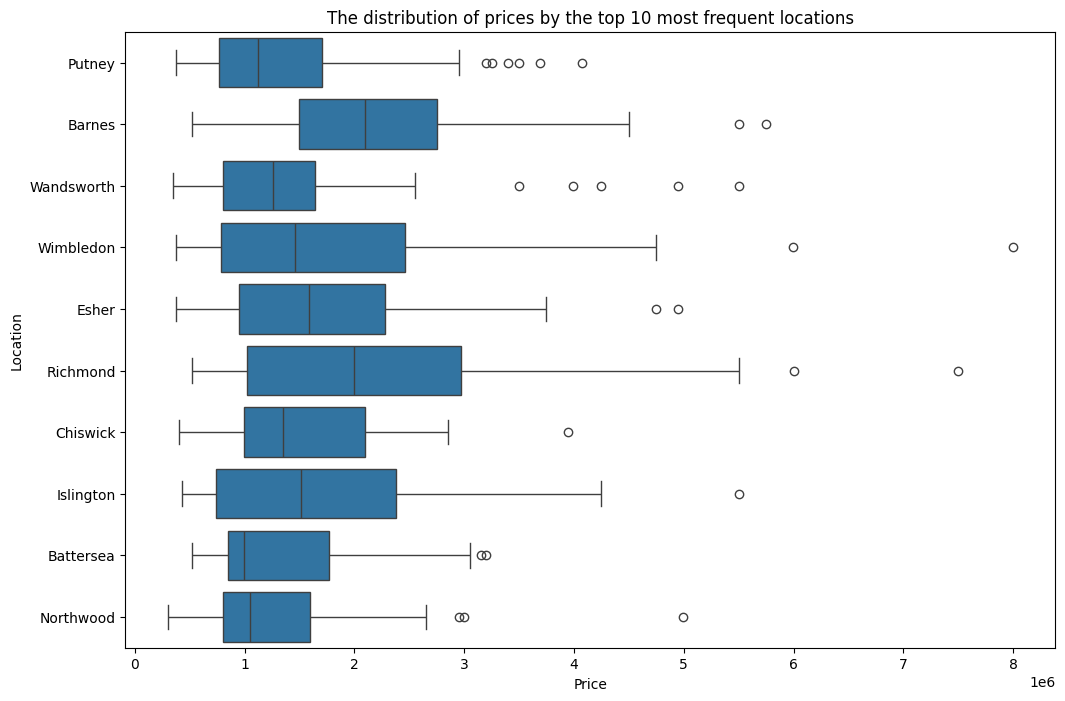

In [12]:
# top-10 the most famous locations
top_10_locations = df['Location'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Price', y='Location', order=top_10_locations)
plt.title('The distribution of prices by the top 10 most frequent locations')
plt.show()

In [13]:
df['Location'].sort_values().nunique()

656

In [14]:
df = df.dropna()

In [15]:
df.head()

,Property Name,Price,House Type,Area_in_sq_ft,Bedrooms,Bathrooms,Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [16]:
print(f"Null values: {df['Location'].isnull().sum()}")

Null values: 0


In [17]:
print("distribution after fillna:")
print(df['Location'].value_counts().head())

distribution after fillna:
Location
Putney        96
Barnes        71
Wandsworth    70
Wimbledon     68
Esher         64
Name: count, dtype: int64


In [18]:
df.dtypes

Property Name    object
Price             int64
House Type       object
Area_in_sq_ft     int64
Bedrooms          int64
Bathrooms         int64
Receptions        int64
Location         object
City/County      object
Postal Code      object
dtype: object

In [19]:
df['Bathrooms'].unique()

array([ 5,  2,  4,  1,  6,  3, 10,  7,  0,  8,  9])

In [20]:
df['Receptions'].unique()

array([ 5,  2,  4,  1,  6,  3, 10,  7,  0,  8,  9])

In [21]:
df.loc[df['Bathrooms'] == 0].sample(5)

,Property Name,Price,House Type,Area_in_sq_ft,Bedrooms,Bathrooms,Receptions,Location,City/County,Postal Code
350,Kersfield House,210000,Studio,328,0,0,0,Putney,London,SW15 3HJ
1345,Vandon Court,450000,Studio,332,0,0,0,Westminster,London,SW1H 9HE
1313,The Madison,573000,New development,429,0,0,0,199 To 207 Marsh Wall,London,E14 9YT
393,Cumberland Terrace Mews,295000,Studio,344,0,0,0,Regent's Park,London,NW1 4HR
770,Montpellier Road,350000,Studio,425,0,0,0,Ealing,London,W5 2QS


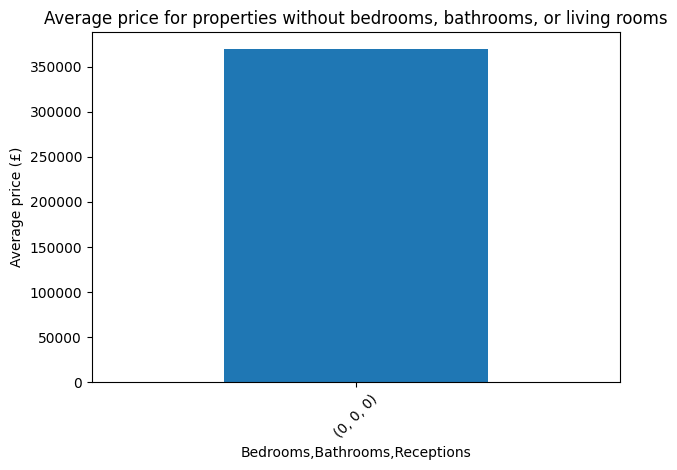

In [22]:
filtered_df = df[(df['Bedrooms'] == 0) & (df['Bathrooms'] == 0) & (df['Receptions'] == 0)]

filtered_df.groupby(['Bedrooms', 'Bathrooms', 'Receptions'])['Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average price for properties without bedrooms, bathrooms, or living rooms')
plt.ylabel('Average price (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
zero_rooms = df[(df['Bedrooms'] == 0) & (df['Bathrooms'] == 0) & (df['Receptions'] == 0)]

In [24]:
print(f"Objects without rooms: {len(zero_rooms)}")
print("Type of property:")
print(zero_rooms['House Type'].value_counts())

Objects without rooms: 7
Type of property:
House Type
Studio             6
New development    1
Name: count, dtype: int64


In [25]:
df['Area_in_sq_ft'].describe()

count     2518.000000
mean      1766.850278
std       1469.490065
min        274.000000
25%        840.000000
50%       1311.500000
75%       2219.000000
max      15405.000000
Name: Area_in_sq_ft, dtype: float64

In [26]:
df['Area_in_sq_ft'].value_counts().unique()

array([8, 7, 6, 5, 4, 3, 2, 1])

In [27]:
print(f"Средняя цена: {df['Price'].mean():,.0f}")
print(f"Медианная цена: {df['Price'].median():,.0f}")
print(f"Мин цена: {df['Price'].min():,.0f}")
print(f"Макс цена: {df['Price'].max():,.0f}")

Средняя цена: 1,877,659
Медианная цена: 1,200,000
Мин цена: 180,000
Макс цена: 39,750,000


In [28]:
# межквартильный размах
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
r = q3 - q1
print(f"q1 (25%): {q1:,.0f}")
print(f"q3 (75%): {q3:,.0f}")
print(f"r: {r:,.0f}")

# границы IQR
lower_bound = q1 - 1.5 * r
upper_bound = q3 + 1.5 * r
print(f"\nСтандартные границы: [{lower_bound:,.0f}, {upper_bound:,.0f}]")

q1 (25%): 725,000
q3 (75%): 2,250,000
r: 1,525,000

Стандартные границы: [-1,562,500, 4,537,500]


In [29]:
p1 = df['Price'].quantile(0.01)   # 1% самых дешевых
p5 = df['Price'].quantile(0.05)   # 5% самых дешевых
p95 = df['Price'].quantile(0.95)  # 5% самых дорогих
p99 = df['Price'].quantile(0.99)  # 1% самых дорогих
    
print(f"\nПроцентили:")
print(f"1% самых дешевых: ≤ {p1:,.0f}")
print(f"5% самых дешевых: ≤ {p5:,.0f}")
print(f"95% самых дорогих: ≥ {p95:,.0f}")
print(f"99% самых дорогих: ≥ {p99:,.0f}")


Процентили:
1% самых дешевых: ≤ 350,000
5% самых дешевых: ≤ 450,000
95% самых дорогих: ≥ 5,253,750
99% самых дорогих: ≥ 10,788,500


In [30]:
#df = df.query(f'Price > {p1} and Price < {p99}').copy()

In [31]:
p2 = df['Area_in_sq_ft'].quantile(0.01)
p22 = df['Area_in_sq_ft'].quantile(0.99)
print(f"1% самых маленьких по площади мест: ≤ {p2:,.0f}")
print(f"99% самых дорогих: ≥ {p22:,.0f}")

1% самых маленьких по площади мест: ≤ 414
99% самых дорогих: ≥ 7,986


In [32]:
#df = df.query(f'Area_in_sq_ft > {p2} and Area_in_sq_ft < {p22}').copy()

In [33]:
df_clean = df.copy(deep=True)

In [34]:
df_clean['price_per_sqft'] = df_clean['Price']/df_clean['Area_in_sq_ft']
df_clean['price_per_sqft'].describe()

count    2518.000000
mean     1050.968979
std       586.443743
min       241.610738
25%       713.234452
50%       902.516708
75%      1184.562336
max      7069.180153
Name: price_per_sqft, dtype: float64

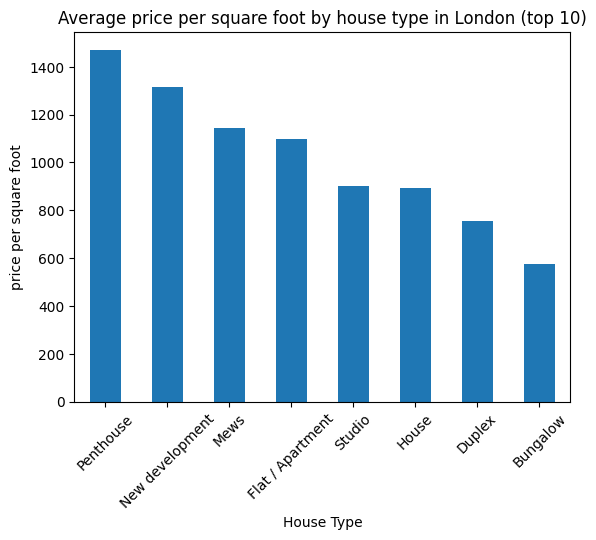

In [35]:
df_clean.groupby('House Type')['price_per_sqft'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average price per square foot by house type in London (top 10)')
plt.ylabel('price per square foot')
plt.xticks(rotation=45)
plt.show()

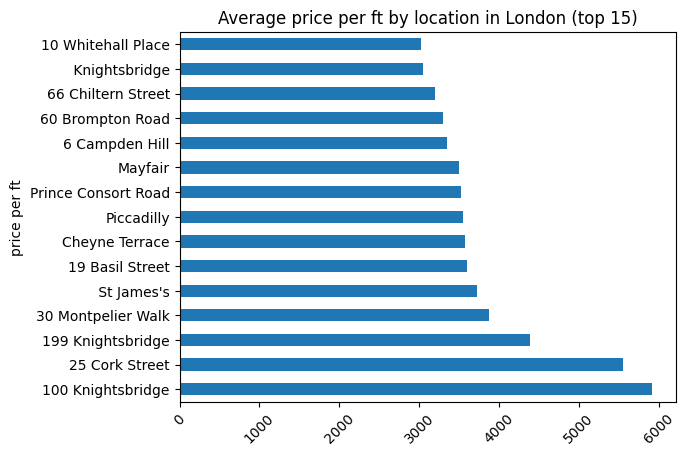

In [36]:
df_clean.groupby('Location')['price_per_sqft'].mean().sort_values(ascending=False).head(15).plot(kind='barh') # horizontal barplot
plt.title('Average price per ft by location in London (top 15)')
plt.ylabel('price per ft')
plt.xticks(rotation=45)
plt.show()

In [37]:
df_clean['City/County'].unique()

array(['London', 'Surrey', 'Clapton', 'Hertfordshire', 'Middlesex',
       'Essex', 'Downs Road', 'E5 8DE', 'Wandsworth', 'Clerkenwell',
       'Deptford', 'Fulham', 'Richmond', 'N7 6QX', 'City Of London',
       'Chessington', 'Little Venice', 'Fulham High Street', 'Twickenham',
       '27 Carlton Drive', 'Fitzrovia', 'Chelsea', 'Marylebone', 'Kent',
       'London1500', 'Watford', 'Bushey', 'Kensington', 'Middx',
       'Romford', 'Queens Park', 'Hornchurch', 'N1 6FU', 'Oxshott',
       'Greenford', 'Wimbledon'], dtype=object)

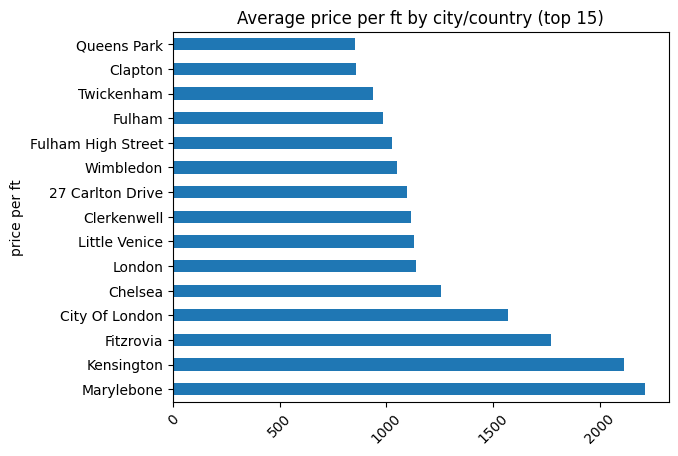

In [38]:
df_clean.groupby('City/County')['price_per_sqft'].mean().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Average price per ft by city/country (top 15)')
plt.ylabel('price per ft')
plt.xticks(rotation=45)
plt.show()

# **Numerical and Categorical Variables**

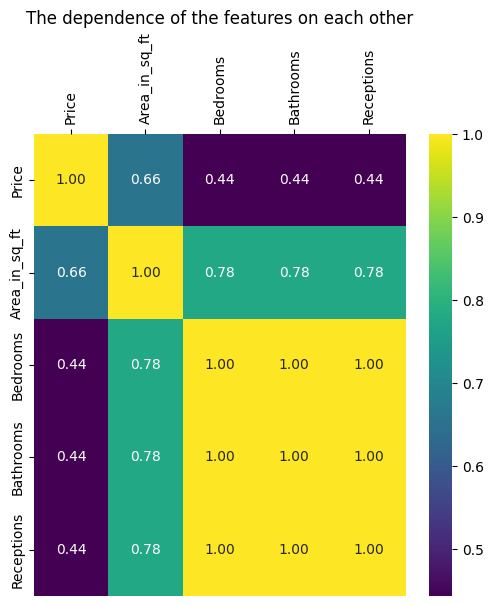

In [39]:
plt.figure(figsize=(6,6))
plt.title('The dependence of the features on each other')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

# heatmap
g = sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
plt.show()

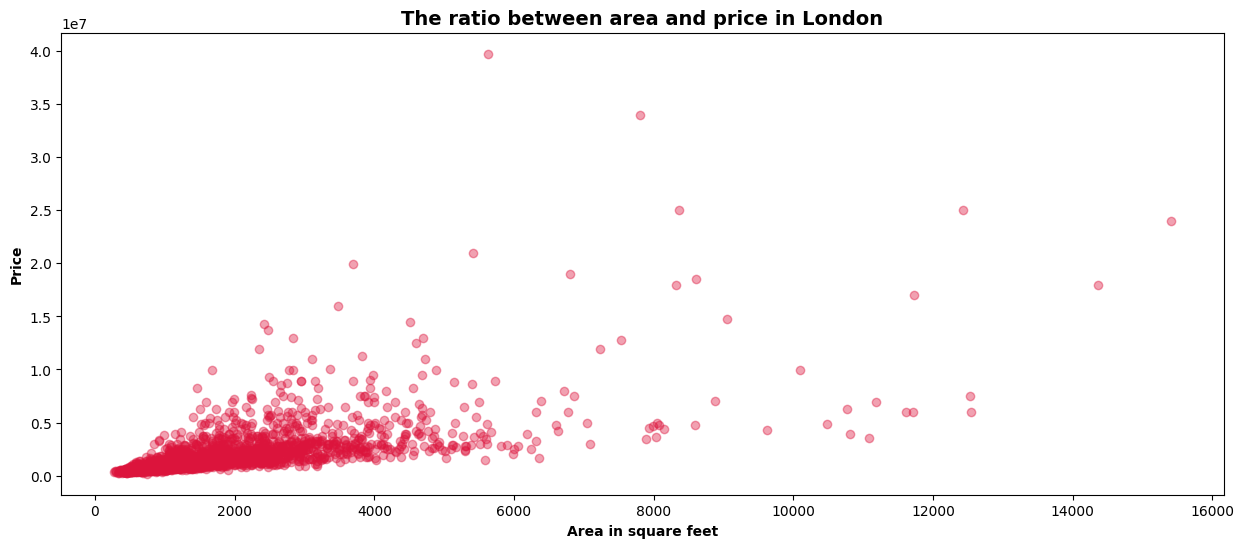

In [40]:
df_clean_1 = df_clean.dropna(subset=['Area_in_sq_ft', 'Price'])

plt.figure(figsize=(15, 6))
plt.scatter(x='Area_in_sq_ft', y='Price', data=df_clean, color='crimson', alpha=0.4)
plt.title('The ratio between area and price in London', weight='bold', fontsize=14)
plt.xlabel('Area in square feet', weight='bold')
plt.ylabel('Price', weight='bold')
plt.show()

In [41]:
df.sample(5)

,Property Name,Price,House Type,Area_in_sq_ft,Bedrooms,Bathrooms,Receptions,Location,City/County,Postal Code
1732,South Hill Park Gardens,4395000,House,3292,5,5,5,Hampstead,London,NW3 2TD
77,Prince Henry Road,625000,House,1348,4,4,4,Kidbrooke,London,SE7 8PP
283,Burlington Lodge Studios,1250000,Flat / Apartment,1201,2,2,2,48 Rigault Road,London,SW6 4JJ
1445,Cornwall Gardens,1450000,Flat / Apartment,963,2,2,2,South Kensington,London,SW7 4AX
199,Ruxley Crescent,1750000,New development,3913,4,4,4,Esher,Surrey,KT10 0TX


In [42]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  5
Number of numerical features are:  5


In [43]:
import seaborn as sns
df_num = df.select_dtypes(include=['number'])
correlation = df_num.corr()['Price'].sort_values(ascending=False).to_frame().head()

cmap = sns.color_palette("magma", as_cmap=True)
n = correlation.style.background_gradient(cmap=cmap)
n

,Price
Price,1.000000
Area_in_sq_ft,0.657285
Bedrooms,0.444013
Bathrooms,0.444013
Receptions,0.444013


Чем больше площадь квартиры, тем выше ее цена. Это ожидаемо и логично.

Районы или объекты с более высокой стоимостью квадратного метра (например, в центре города) также будут иметь более высокую общую цену.

Наличие большего количества ванных комнат или спален увеличивает цену, но, опять же, это влияет меньше, чем площадь.

In [44]:
numeric_columns = ['Area_in_sq_ft', 'Bedrooms', 'Bathrooms', 'Receptions', 'Price']

category_columns = ['Property Name', 'House Type', 'Location', 'City/County',	'Postal Code']

       Area_in_sq_ft     Bedrooms    Bathrooms   Receptions         Price
count    2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean     1766.850278     3.118348     3.118348     3.118348  1.877659e+06
std      1469.490065     1.539408     1.539408     1.539408  2.324242e+06
min       274.000000     0.000000     0.000000     0.000000  1.800000e+05
25%       840.000000     2.000000     2.000000     2.000000  7.250000e+05
50%      1311.500000     3.000000     3.000000     3.000000  1.200000e+06
75%      2219.000000     4.000000     4.000000     4.000000  2.250000e+06
max     15405.000000    10.000000    10.000000    10.000000  3.975000e+07


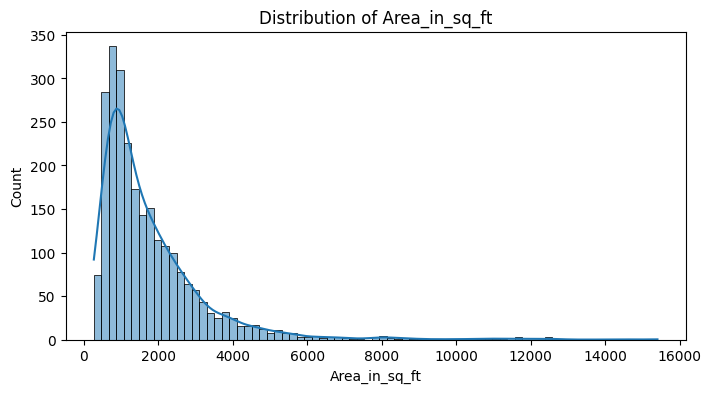

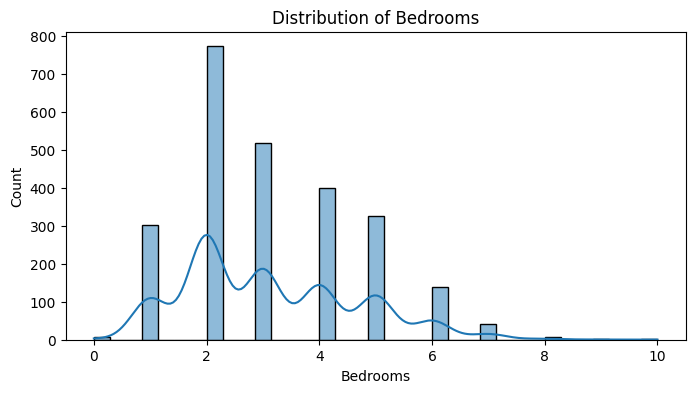

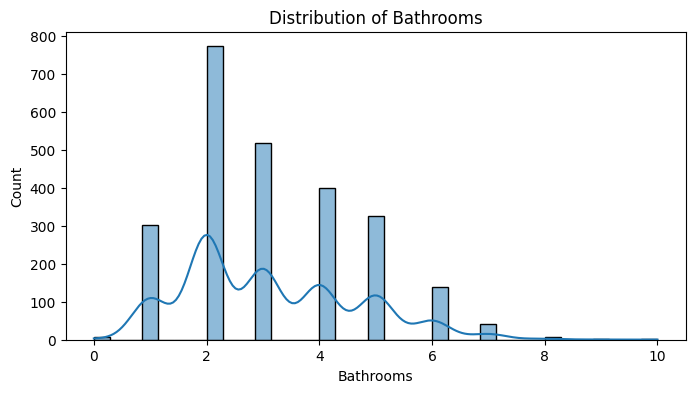

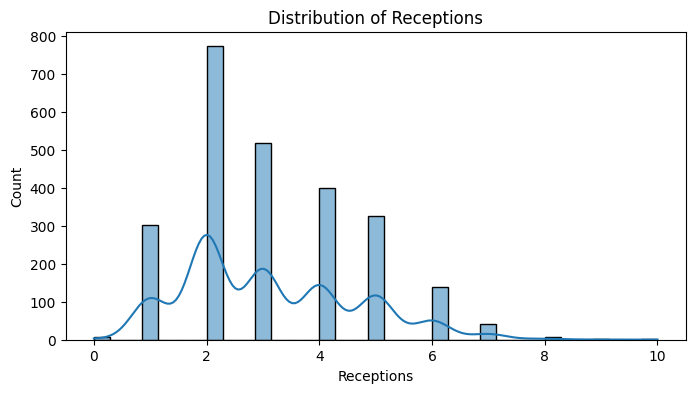

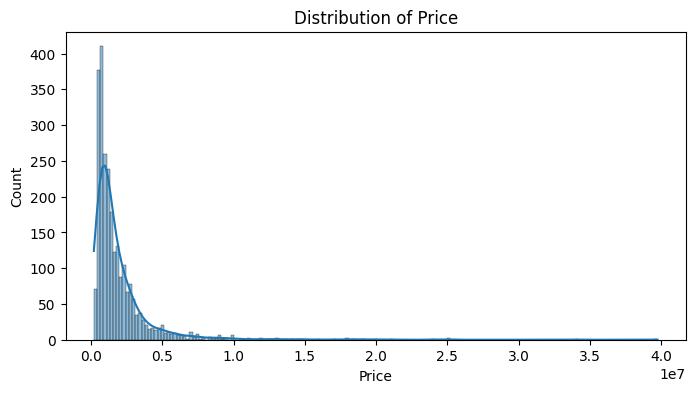

In [45]:
print(df[numeric_columns].describe())
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

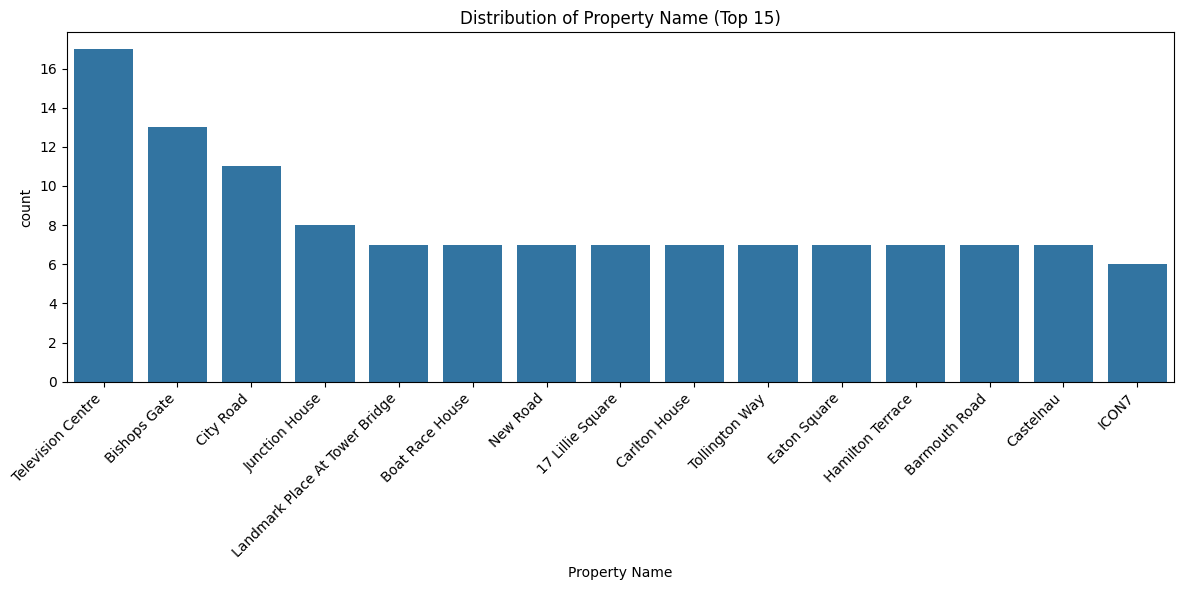

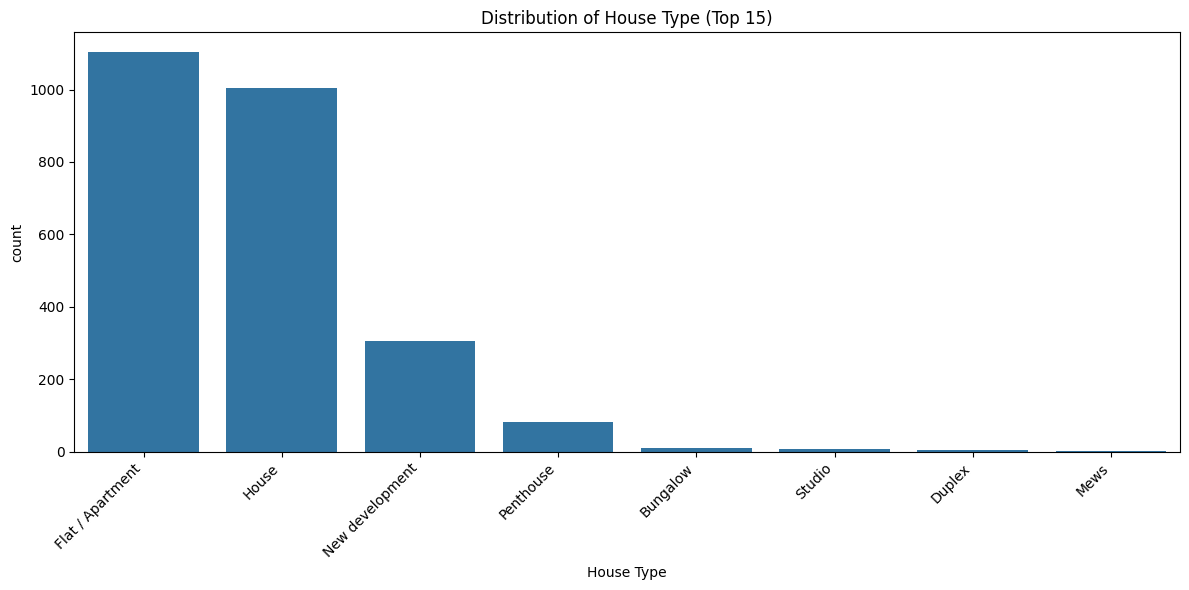

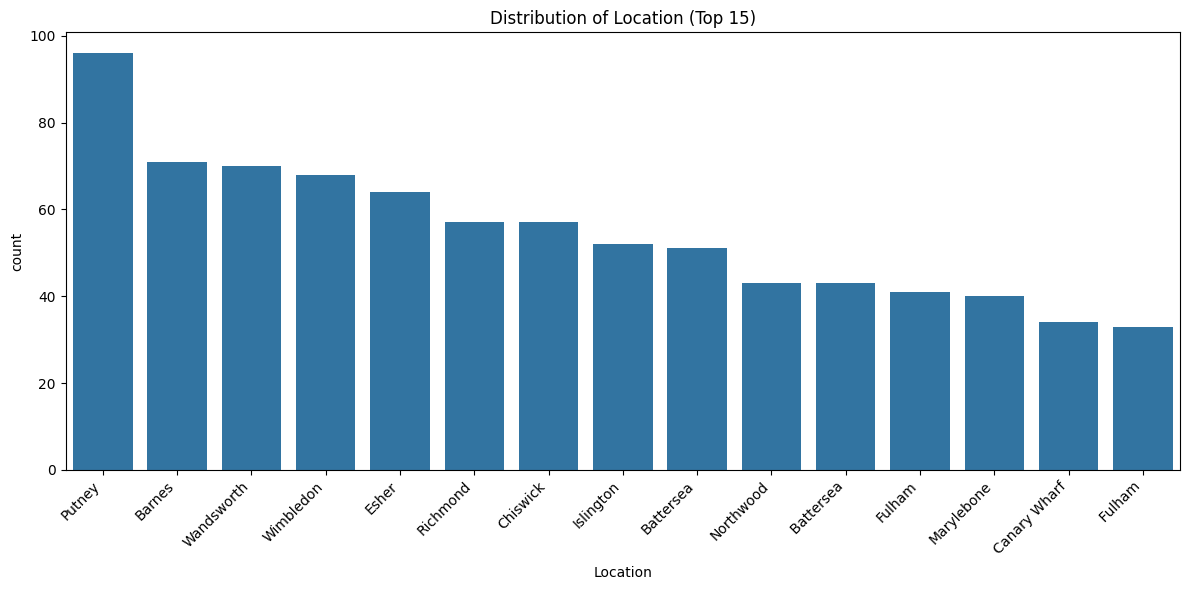

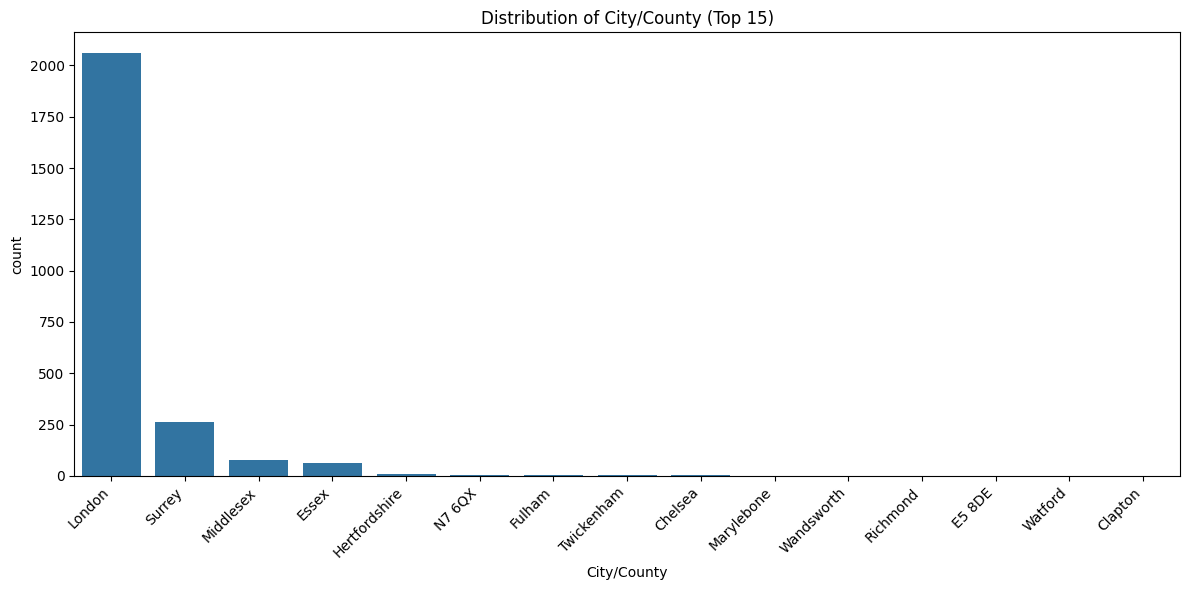

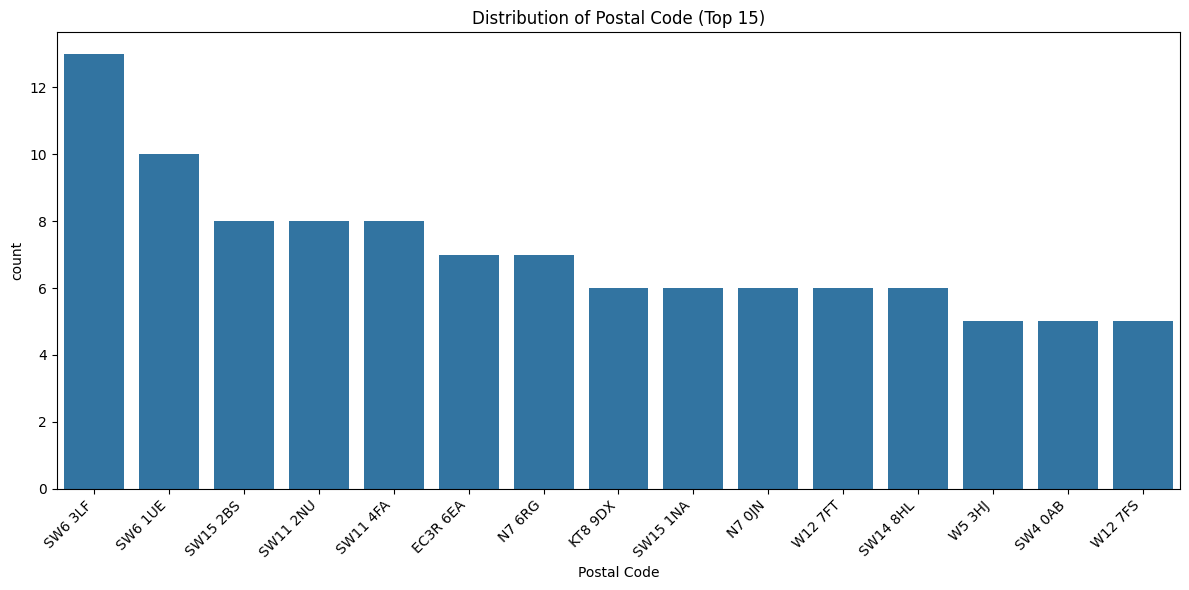

In [46]:
for col in category_columns:
    plt.figure(figsize=(12, 6))
    top_categories = df[col].value_counts().head(15).index
    filtered_df = df[df[col].isin(top_categories)]
    sns.countplot(x=col, data=filtered_df, order=top_categories)
    plt.title(f'Distribution of {col} (Top 15)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Encoding**

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import HuberRegressor, QuantileRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
seed = 200
np.random.seed(seed)
random.seed(seed)

In [49]:
df.drop('Postal Code', axis=1, inplace=True)

In [50]:
X = df.drop('Price', axis=1)
y = df['Price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [52]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Числовые колонки:", numerical_cols)
print("Категориальные колонки:", object_cols)

Числовые колонки: ['Area_in_sq_ft', 'Bedrooms', 'Bathrooms', 'Receptions']
Категориальные колонки: ['Property Name', 'House Type', 'Location', 'City/County']


In [53]:
imputer = SimpleImputer(strategy='most_frequent')
df['Location'] = imputer.fit_transform(df[['Location']]).flatten()
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [54]:
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_test)

In [55]:
categorical_features = Pipeline(steps=[
    ('imputer', imputer),
    ('ohe', one_hot_encoder)])

numerical_features = Pipeline(steps=[
    ('scaler', StandardScaler())])

columnTransformer = ColumnTransformer(transformers=[
    ('num', numerical_features, numerical_cols),
    ('cat', categorical_features, object_cols)])

In [56]:
full_pipeline = Pipeline([
    ('preprocessor', columnTransformer),
    ('regressor', LinearRegression())
])

# **Linear Regression**

In [57]:
param_grid = [
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [Ridge(random_state=200)],
        'regressor__alpha': [0.5, 1.0, 2.0, 5.0]
    },
    {
        'regressor': [Lasso(random_state=200)],
        'regressor__alpha': [0.5, 1.0, 2.0, 5.0]
    },
    {
        'regressor': [ElasticNet(random_state=200)],
        'regressor__alpha': [0.05, 1.0, 5.0],
        'regressor__l1_ratio': [0.3, 0.5, 0.7]
    }
]

grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    refit=True)
print("Starting GridSearch with multiple models...")
grid_search.fit(X_train, y_train_log)

Starting GridSearch with multiple models...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Area_in_sq_ft',
                                                                          'Bedrooms',
                                                                          'Bathrooms',
                                                                          'Receptions']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Property '
                                                                          'Name',
                                                                          'House '
                                                                          '...
             param_grid=[{'regressor': [LinearRegression()]},
                         {'regressor': [Ridge(random_state=200)],
                          'regressor__alpha': [0.5, 1.0, 2.0, 5.0]},
                         {'regressor': [Lasso(random_state=200)],
                          'regressor__alpha': [0.5, 1.0, 2.0, 5.0]},
                         {'regressor': [ElasticNet(random_state=200)],
                          'regressor__alpha': [0.05, 1.0, 5.0],
                          'regressor__l1_ratio': [0.3, 0.5, 0.7]}],
             scoring='neg_root_mean_squared_error', verbose=1)

In [58]:
print("Лучшие параметры:", grid_search.best_params_)
print(f"Лучший RMSE: {-grid_search.best_score_:.6f}")

Лучшие параметры: {'regressor': Ridge(random_state=200), 'regressor__alpha': 1.0}
Лучший RMSE: 0.361968


In [59]:
best_model = grid_search.best_estimator_

In [60]:
y_pred_log = best_model.predict(X_test)
y_pred_original = np.expm1(y_pred_log)
y_true_original = np.expm1(y_valid_log)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(y_true_original, y_pred_original)
mape = mean_absolute_percentage_error(y_true_original, y_pred_original) * 100
rmse_original = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
median_error = np.median(np.abs(y_true_original - y_pred_original))

print("Метрики в ценах:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse_original:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Медианная ошибка: {median_error:.2f}")

Метрики в ценах:
MAE: 506042.89
RMSE: 1155343.37
MAPE: 24.14%
Медианная ошибка: 208436.45


In [62]:
y_train_pred_log = best_model.predict(X_train)
y_train_pred_original = np.expm1(y_train_pred_log)
y_train_original = np.expm1(y_train_log)

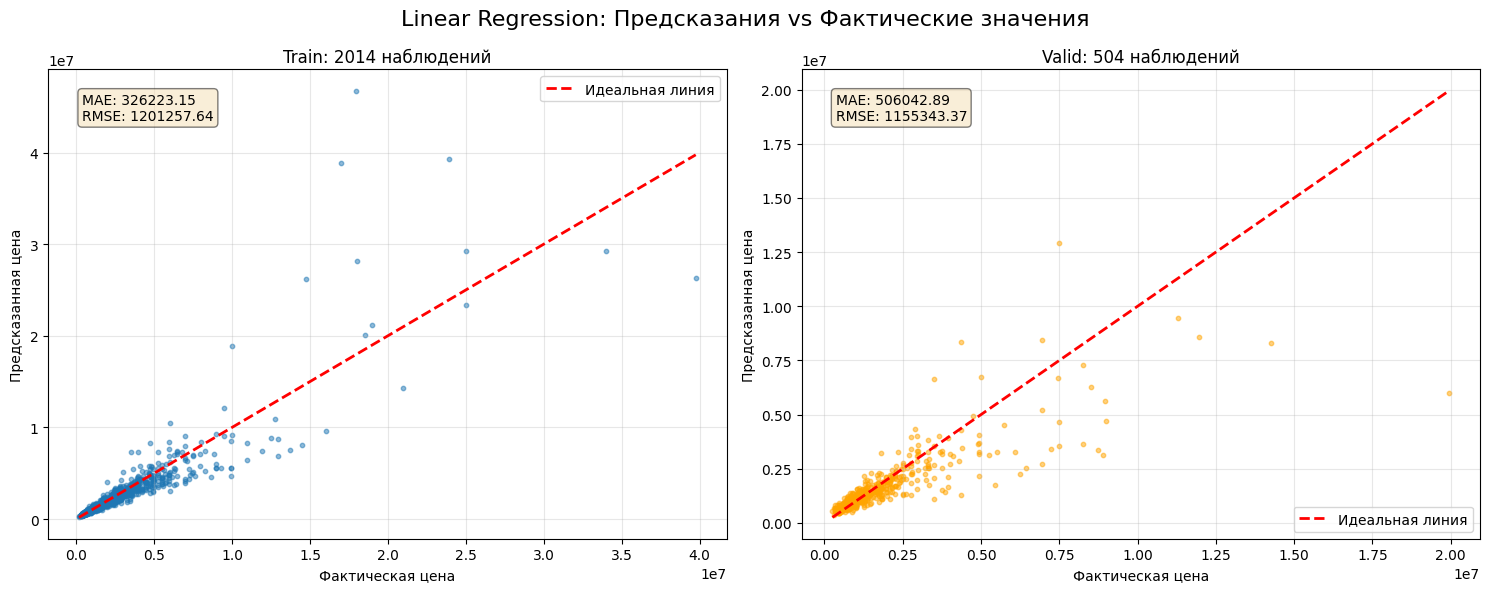

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(y_train_original, y_train_pred_original, alpha=0.5, s=10)
axes[0].plot([y_train_original.min(), y_train_original.max()],
             [y_train_original.min(), y_train_original.max()],
             'r--', lw=2, label='Идеальная линия')
axes[0].set_xlabel('Фактическая цена')
axes[0].set_ylabel('Предсказанная цена')
axes[0].set_title(f'Train: {len(y_train_original)} наблюдений')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
train_rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
axes[0].text(0.05, 0.95, f'MAE: {train_mae:.2f}\n'
                         f'RMSE: {train_rmse:.2f}',
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].scatter(y_true_original, y_pred_original, alpha=0.5, s=10, color='orange')
axes[1].plot([y_true_original.min(), y_true_original.max()],
             [y_true_original.min(), y_true_original.max()],
             'r--', lw=2, label='Идеальная линия')
axes[1].set_xlabel('Фактическая цена')
axes[1].set_ylabel('Предсказанная цена')
axes[1].set_title(f'Valid: {len(y_true_original)} наблюдений')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
mae = mean_absolute_error(y_true_original, y_pred_original)
rmse_original = np.sqrt(mean_squared_error(y_true_original, y_pred_original))

axes[1].text(0.05, 0.95, f'MAE: {mae:.2f}\nRMSE: {rmse_original:.2f}',
             transform=axes[1].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Linear Regression: Предсказания vs Фактические значения', fontsize=16)
plt.tight_layout()
plt.show()